# Fall Armyworm Detection - YOLOv8

The dataset used was FAW Dataset.

To increase the size of the dataset few image augmentation technique was used.The following are the augmentation techniques used:

*   Horizontal Flip
*   Vertical Flip
*   Linear Contrast
*   Gamma Contrast
*   Sigmoid Contrast
*   Gaussian Noise

Total no of images = 1189
The dataset was divided into 70-30 for training and testing respectively.

No of images for training = 832

No of images for testing = 357


## Configuring cuDNN on Colab for YOLOv8

In [1]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [2]:
!nvidia-smi

Fri Jul 21 12:55:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Mounting the drive folder in Notebook

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [5]:
%cd /mydrive/fallarmyworm/

/content/gdrive/My Drive/fallarmyworm


## Install YOLOv8

In [6]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.3/78.2 GB disk)


In [7]:
from ultralytics import YOLO

from IPython.display import display, Image

## Training the FAW dataset

In [8]:
!yolo task=detect mode=train model=yolov8n.pt data=data.yaml epochs=80 imgsz=640 plots=True

100% 6.23M/6.23M [00:00<00:00, 68.1MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=data.yaml, epochs=80, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=F

## Predict few images abd saving in the folder

In [11]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source="datasets/test/images/*.jpg" imgsz=640 save=True

2023-07-21 14:13:52.076056: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-21 14:13:53.580779: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
image 1/357 /content/gdrive/MyDrive/fallarmyworm/datasets/test/images/image-1-_jpg.rf.5ba1575b0a12d7774fef04e9c9ae832e.jpg: 640x640 1 fallarmyworm, 9.0ms
image 2/357 /content/gdrive/MyDrive/fallarmyworm/datasets/test/images/image-10-_jpg.rf.a0d8d589a44526505089435f967a7991.jpg: 640x640 1 fallarmyworm, 8.0ms
image 3/357 /content/gdrive/MyDrive/fallarmyworm/datasets/test/images/image-1002-_jpg.rf.4

## Results

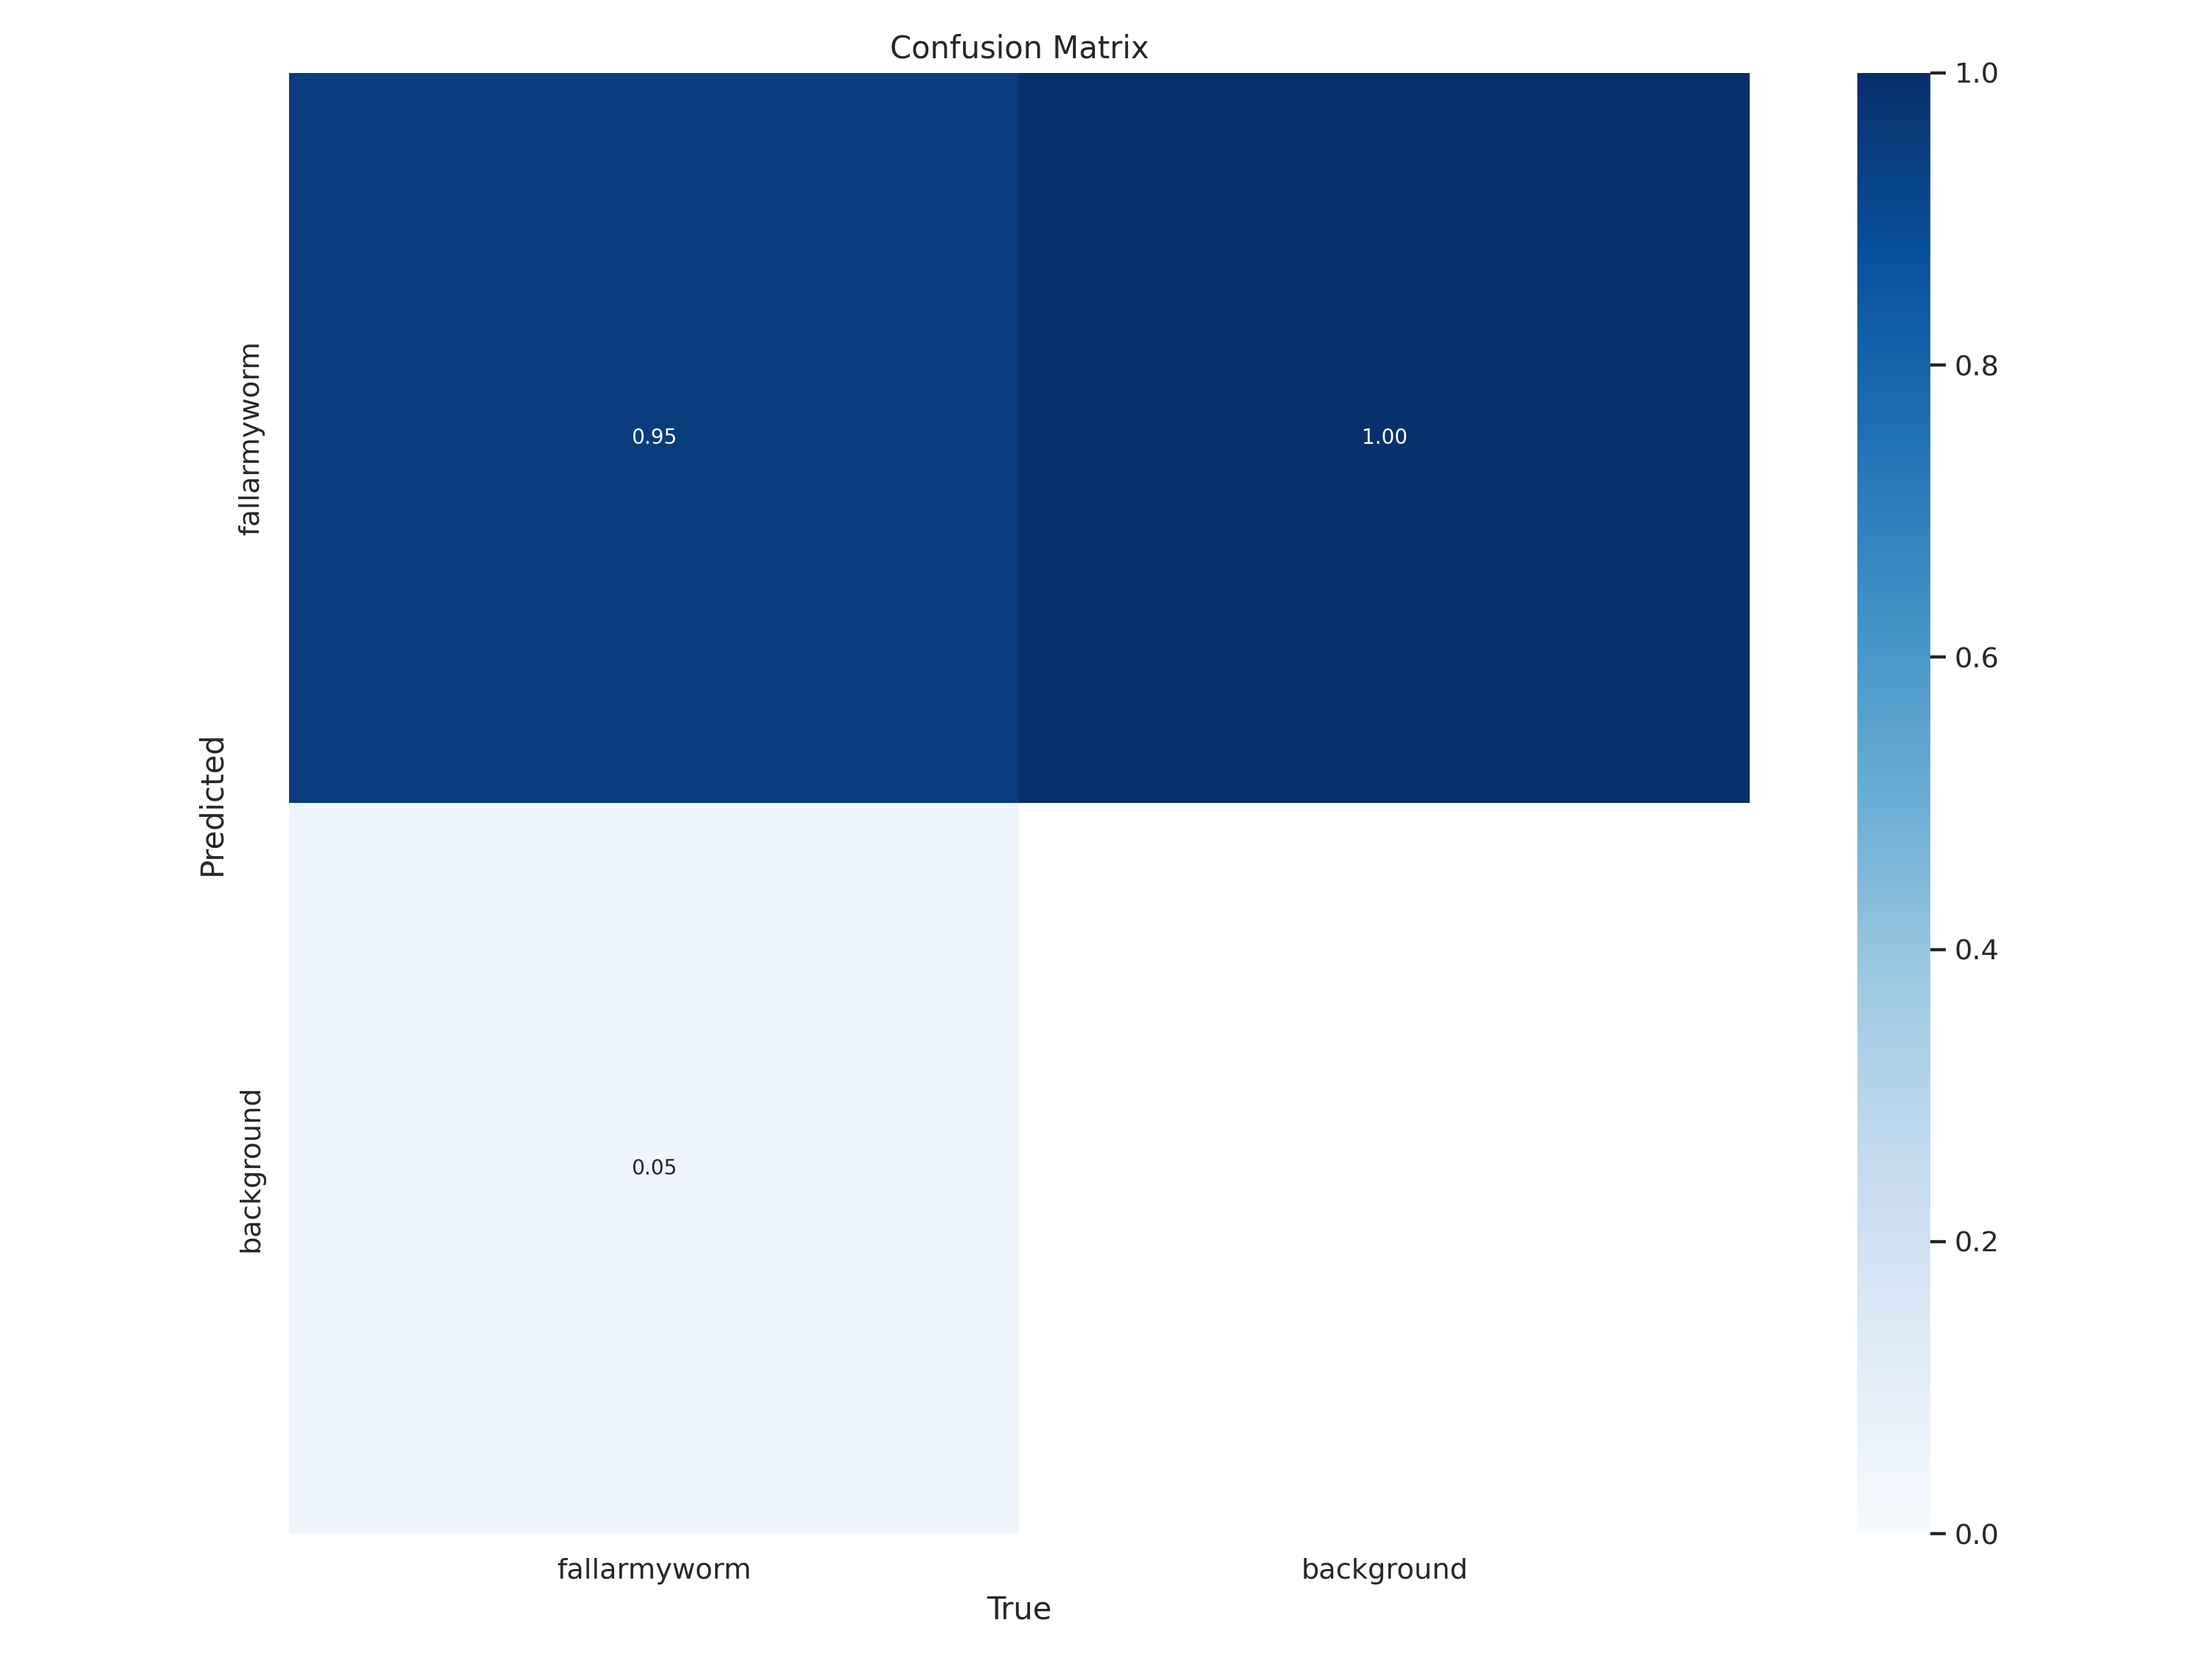

In [13]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

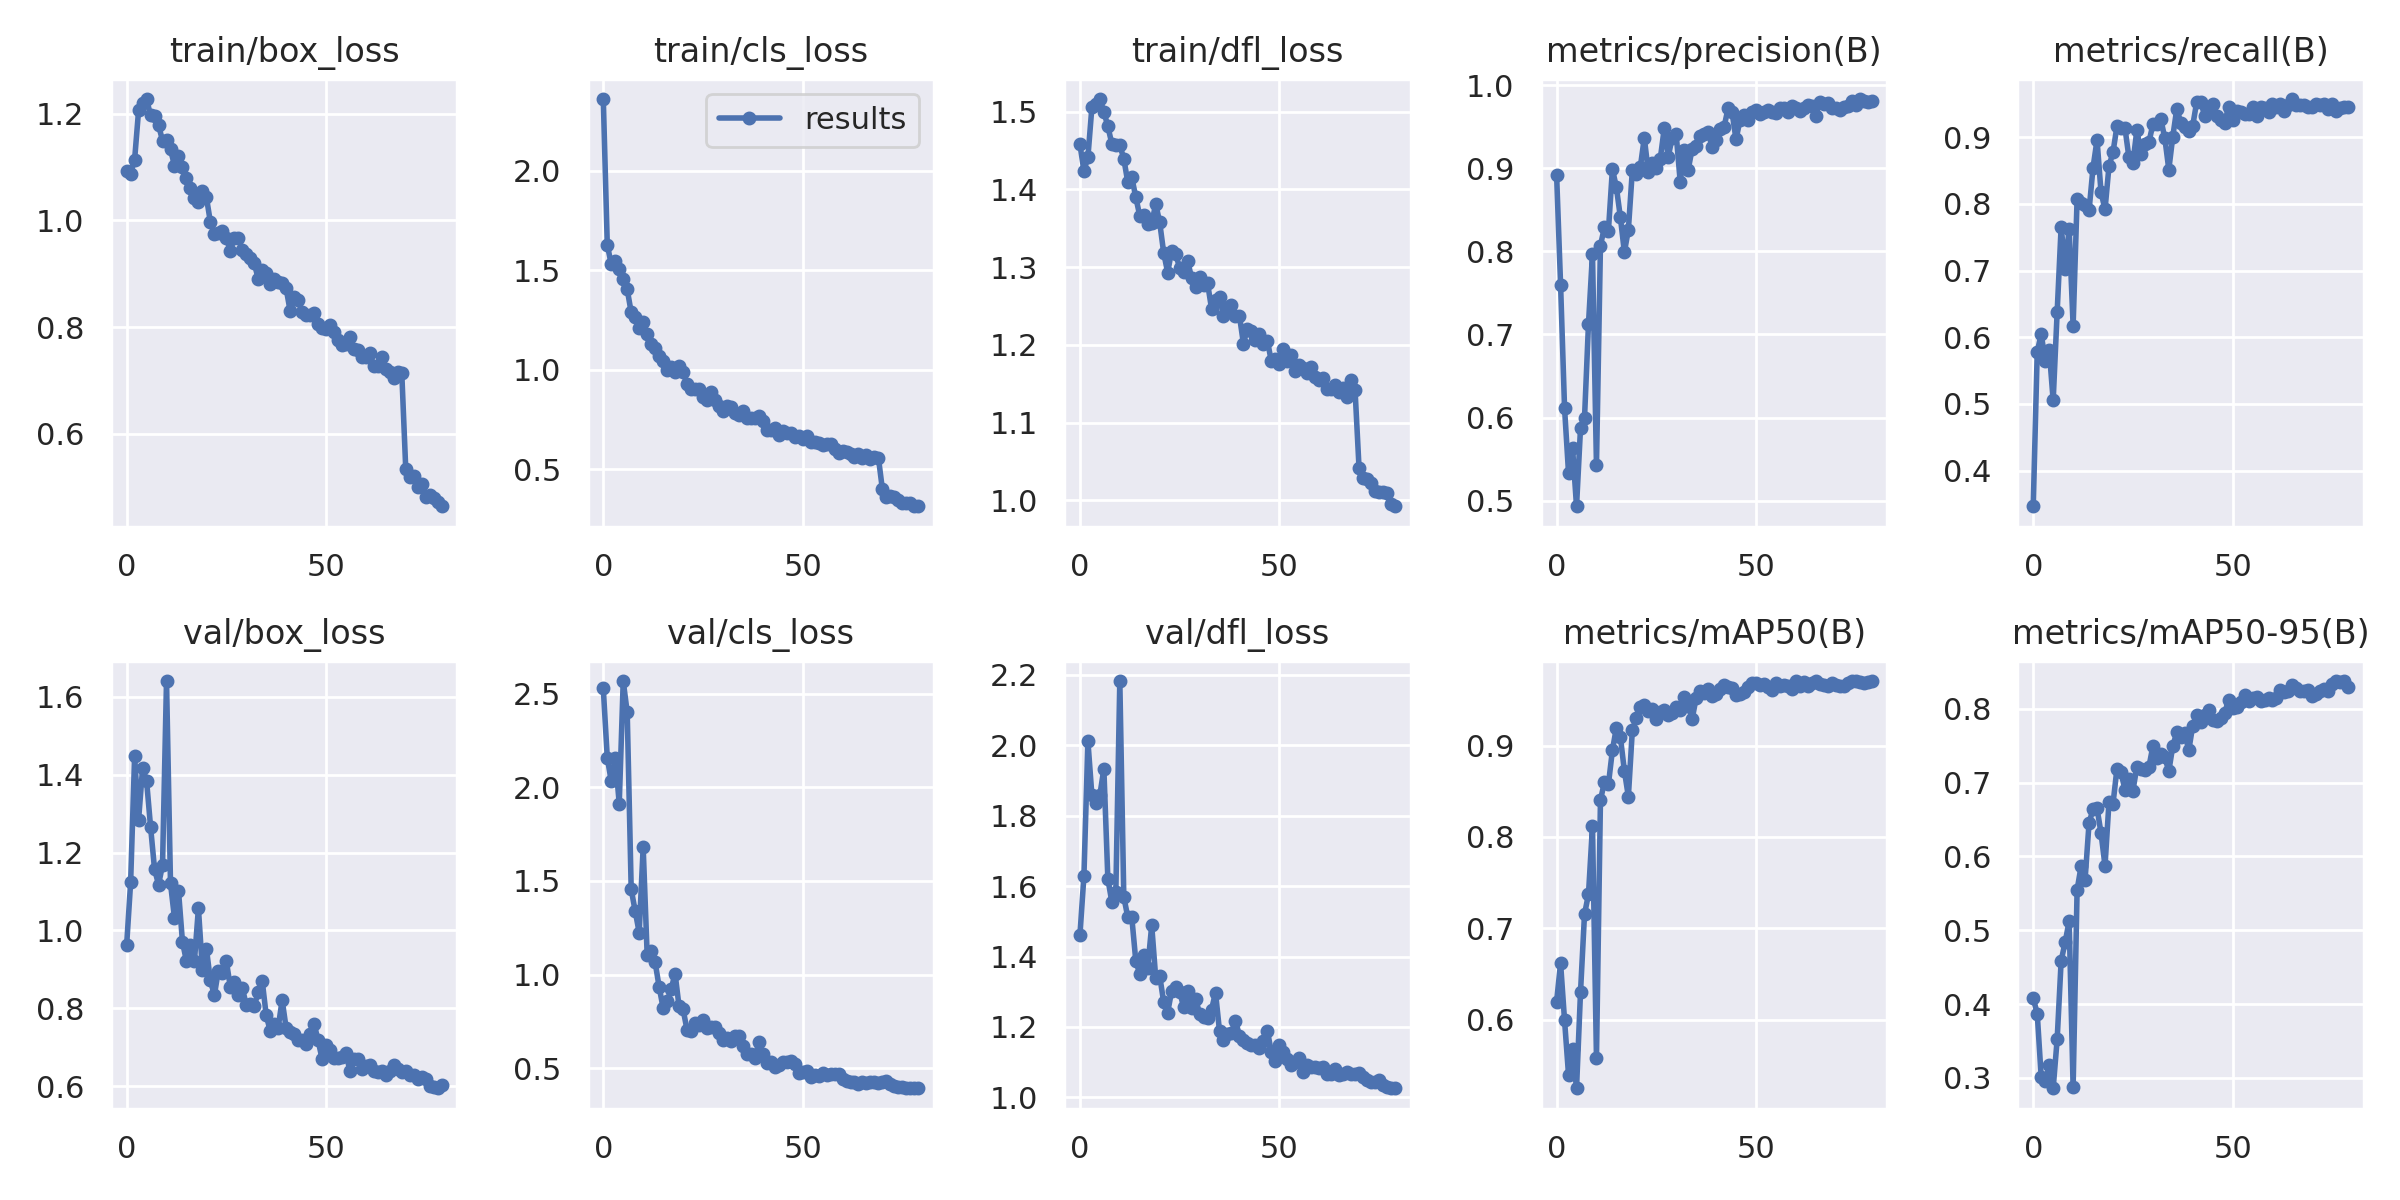

In [14]:
Image(filename='runs/detect/train/results.png', width=600)